In [2]:
using DataFrames
using DataStructures
using Plots
using Distributions
include("../../ThinkBayes.jl/src/ThinkBayes.jl")
using .ThinkBayes

In [3]:
odds(p) = p / (1 - p)

odds (generic function with 1 method)

In [4]:
odds(0.75)

3.0

In [5]:
odds(0.1)

0.11111111111111112

In [6]:
odds(0.9)

9.000000000000002

In [7]:
prob(o) = o / (o+1)

prob (generic function with 1 method)

In [8]:
prob(3/2)

0.6

In [9]:
prob2(y, n) = y / (y + n)

prob2 (generic function with 1 method)

In [10]:
prob2(3, 2)

0.6

## Oliver's blood

In [11]:
like1= 0.01
like2=2 * 0.6 * 0.01
likelihood_ratio=like1 / like2

0.8333333333333334

In [12]:
post_odds= 1 * like1 / like2
prob(post_odds)

0.45454545454545453

In [13]:
odds(.9)

9.000000000000002

In [14]:
post_odds= odds(0.9) * like1 / like2
prob(post_odds)

0.8823529411764706

In [15]:
post_odds = odds(0.1) * like1 / like2
prob(post_odds)

0.0847457627118644

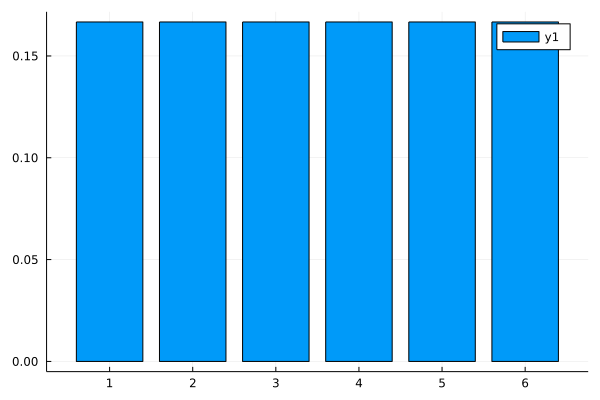

In [19]:
function make_die(sides)
    outcomes=1:sides
    pmf_from_seq(outcomes)
end
die = make_die(6)
bar(die)